In [2]:
# libraries import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Import Data
The following code imports all 5 sensor data and cleans up the tables by changing the column names and and changing the data values to number. It imports some sensor metadata as well

In [3]:
bt1 = pd.read_csv("BT1 Data.csv")
bt1 = bt1.iloc[:,:-3]
bt1 = bt1.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt1 = bt1.drop(0)
bt1 = bt1.reset_index()
bt1["avg wave height"] = pd.to_numeric(bt1["avg wave height"],errors='coerce')
bt1["depth"] = pd.to_numeric(bt1["depth"],errors='coerce')
bt1["sig wave height"] = pd.to_numeric(bt1["sig wave height"],errors='coerce')
bt1["depth_corrected"] = 2.150 + bt1["depth"]

bt2 = pd.read_csv("BT2 Data.csv")
bt2 = bt2.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt2 = bt2.drop(0)
bt2 = bt2.reset_index()
bt2["avg wave height"] = pd.to_numeric(bt2["avg wave height"],errors='coerce')
bt2["depth"] = pd.to_numeric(bt2["depth"],errors='coerce')
bt2["sig wave height"] = pd.to_numeric(bt2["sig wave height"],errors='coerce')
bt2["depth_corrected"] = 2.391 + bt2["depth"]

bt3 = pd.read_csv("BT3 Data.csv")
bt3 = bt3.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt3 = bt3.drop(0)
bt3 = bt3.reset_index()
bt3["avg wave height"] = pd.to_numeric(bt3["avg wave height"],errors='coerce')
bt3["depth"] = pd.to_numeric(bt3["depth"],errors='coerce')
bt3["sig wave height"] = pd.to_numeric(bt3["sig wave height"],errors='coerce')
bt3["depth_corrected"] = 2.296 + bt3["depth"]

bt4 = pd.read_csv("BT4 Data.csv")
bt4 = bt4.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt4 = bt4.drop(0)
bt4 = bt4.reset_index()
bt4["avg wave height"] = pd.to_numeric(bt4["avg wave height"],errors='coerce')
bt4["depth"] = pd.to_numeric(bt4["depth"],errors='coerce')
bt4["sig wave height"] = pd.to_numeric(bt4["sig wave height"],errors='coerce')
bt4["depth_corrected"] = 2.280 + bt4["depth"]

bt5 = pd.read_csv("BT5 Data.csv")
bt5 = bt5.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt5 = bt5.drop(0)
bt5 = bt5.reset_index()
bt5["avg wave height"] = pd.to_numeric(bt5["avg wave height"],errors='coerce')
bt5["depth"] = pd.to_numeric(bt5["depth"],errors='coerce')
bt5["sig wave height"] = pd.to_numeric(bt5["sig wave height"],errors='coerce')
bt5["depth_corrected"] = 2.238 + bt5["depth"]

X = [0, 1.5, 8.3, 18.4, 29.6]

sensors = pd.read_csv("data_sensors.csv")

The following code defines the two wave attenuation function that we want to use to model for our marsh.

In [11]:
# Kobayashi function: H = H_0 * e^(-kx) 
def kobayashi(x, H_0, k):
    return H_0 * np.exp(-k*x)

# Lei and Nepf function: H = H_0 / (1+k * H_0 * x)
def lei(x, H_0, k):
    return H_0 / (1+k * H_0 * x)
    
plotx = np.linspace(0, 30, num = 50)

The following code ploted the average wave height and depth over time. I mainly used this to scan through the data to find periods of time where the marsh was inundated. It was also a graphic used in my presentation.

Start time:  2021-06-22 03:20:00.000
 End time:  2021-06-22 07:05:00.000


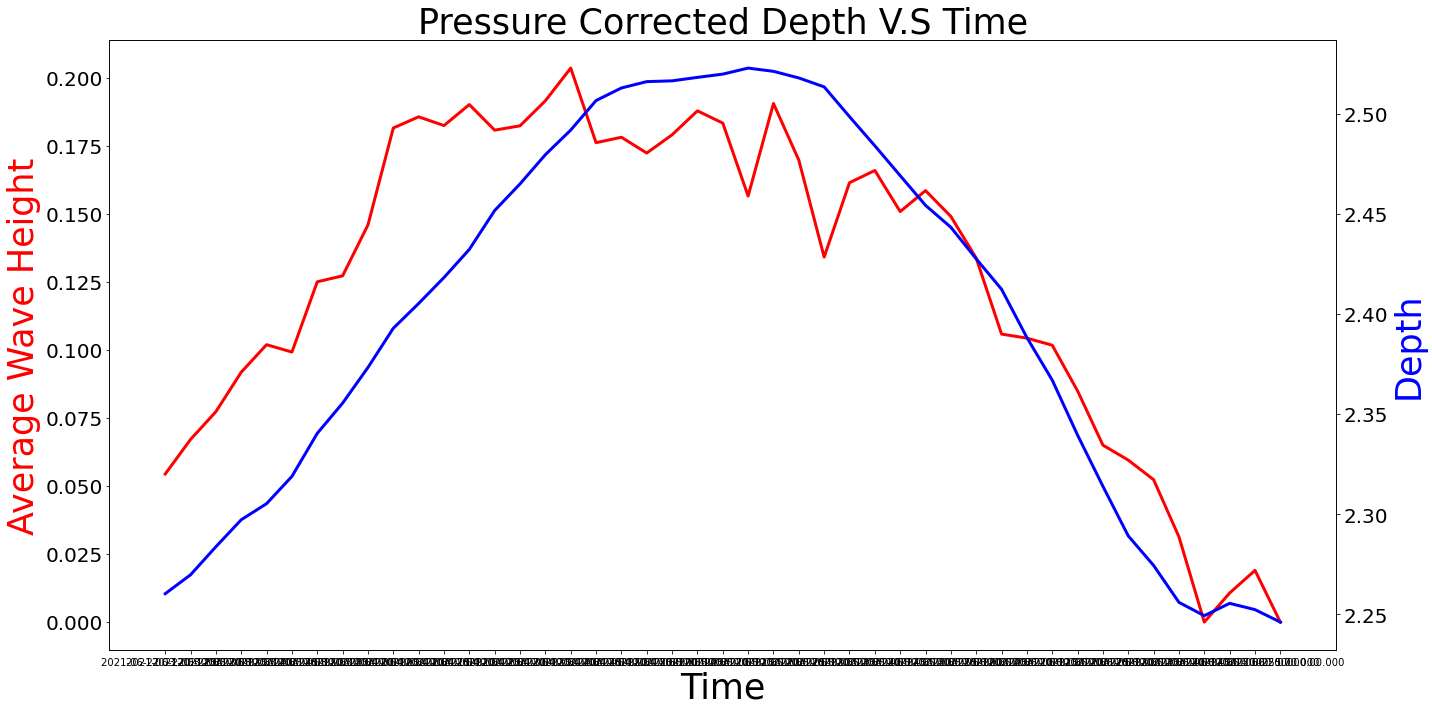

In [12]:
#2206-2232
start = 1900
end = 1945
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlabel("Time", fontsize = 35)
ax1.set_ylabel("Average Wave Height", color="red", fontsize = 35)
ax1.plot(bt1["time"][start:end], bt1["avg wave height"][start:end], linewidth=3, color="red")
plt.yticks(fontsize=20)

ax2 = ax1.twinx()
ax2.set_xlabel("Time", fontsize = 35)
ax2.set_ylabel("Depth", color="blue", fontsize = 35)
ax2.plot(bt1["time"][start:end], bt1["depth_corrected"][start:end], linewidth=3, color="blue")
plt.title("Pressure Corrected Depth V.S Time", fontdict = {'fontsize' : 35})
plt.yticks(fontsize=20)
#ax2.set_ylim([-0.1,0.5])
print("Start time: ", bt1["time"][start])
print(" End time: ", bt1["time"][end])
plt.tight_layout()
plt.show()

The following code takes the average wave height at all the sensors during an inundation period. It then uses a curve fitting algorithm to fif the exponential and inverse wave attenuation function to the curves. Here are my results from curve fitting three inundation periods. In all of them, the exponential decay function modelled it the best.

Another thing to note is that the curve fitting function didn't work in the beginning or end of the inundation period when wave heights were rising/falling.

Plot 1

Start time:  2021-06-22 04:20:00.000
End time:  2021-06-22 04:50:00.000
Kobayashi Variance:  1.2086048376202288e-05
Lei and Kampf Variance:  0.0005292550633951447


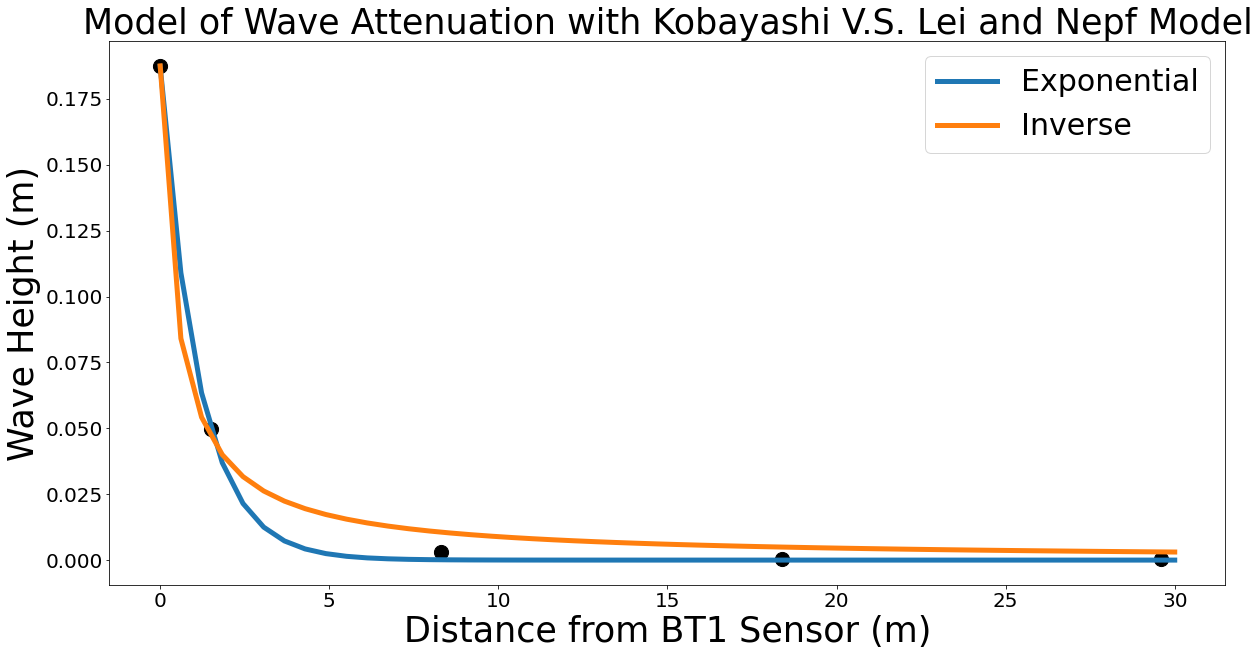

In [15]:
#Total time: 1900 - 1945
start = 1912
end = 1918
avg_heights = [np.mean(bt1["avg wave height"][start:end]), np.mean(bt2["avg wave height"][start:end]), 
              np.mean(bt3["avg wave height"][start:end]), np.mean(bt4["avg wave height"][start:end]),
              np.mean(bt5["avg wave height"][start:end])]
kobayashi_consts, kobayashi_covar = curve_fit(kobayashi, X, avg_heights)
moller_consts, moller_covar = curve_fit(moller, X, avg_heights)
lei_consts, lei_covar = curve_fit(lei, X, avg_heights)
kobayashi_out = []
moller_out = []
lei_out = []
for i in plotx:
    kobayashi_out = np.append(kobayashi_out, kobayashi(i, *kobayashi_consts))
    moller_out = np.append(moller_out, moller(i, *moller_consts))
    lei_out = np.append(lei_out, lei(i, *lei_consts))


print("Start time: ", bt1["time"][start])
print("End time: ", bt1["time"][end])
print("Kobayashi Variance: ", kobayashi_covar[1,0])
#print("Moller Variance: ", moller_covar[1,0])
print("Lei and Kampf Variance: ", lei_covar[1,0])
fig = plt.figure(figsize=(20,10))
plt.plot(plotx, kobayashi_out, linewidth=5)
#plt.plot(plotx, moller_out)
plt.plot(plotx, lei_out, linewidth=5)
plt.scatter(X, avg_heights, color="black", s=200)
plt.title("Model of Wave Attenuation with Kobayashi V.S. Lei and Nepf Model", fontdict = {'fontsize' : 35})
plt.xlabel("Distance from BT1 Sensor (m)", fontdict = {'fontsize' : 35})
plt.ylabel("Wave Height (m)", fontdict = {'fontsize' : 35})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["Exponential", "Inverse"], fontsize=30)
plt.show()

Plot 2

Start time:  2021-06-23 05:10:00.000
End time:  2021-06-23 05:40:00.000
Kobayashi Variance:  2.649648083226498e-05
Lei and Kampf Variance:  0.002510151613260804


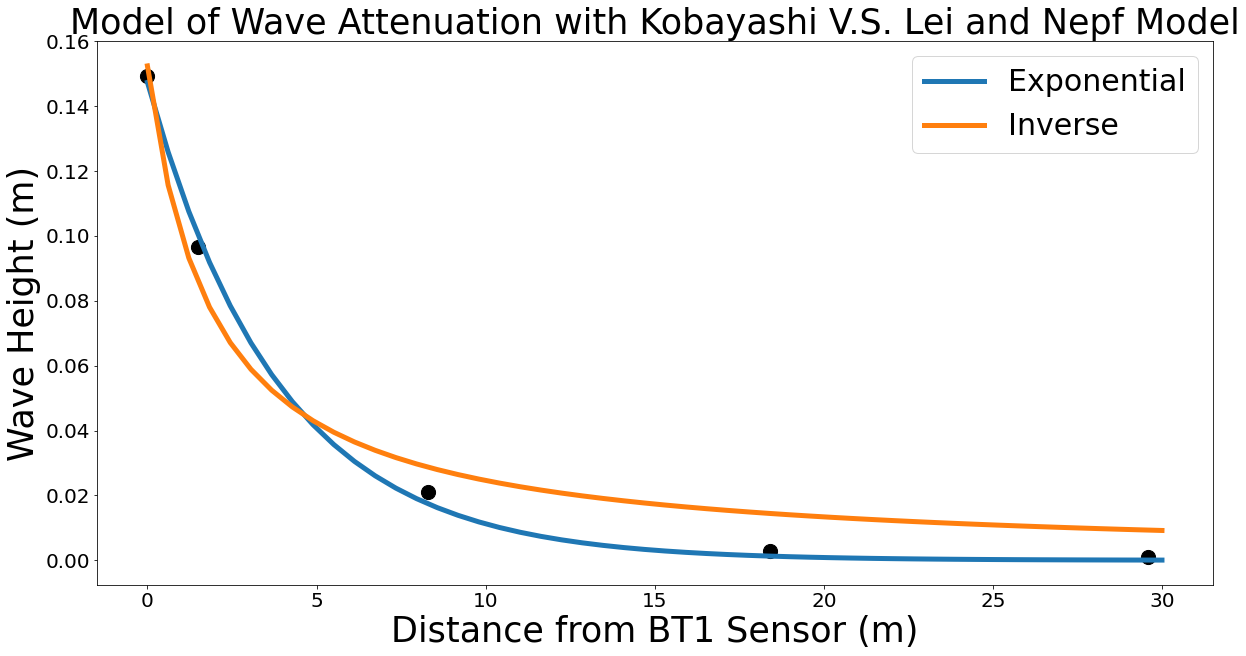

In [7]:
#Total time: 2195 - 2246
#Start - end : 2210 - 2216
start = 2210
end = 2216
avg_heights = [np.mean(bt1["avg wave height"][start:end]), np.mean(bt2["avg wave height"][start:end]), 
              np.mean(bt3["avg wave height"][start:end]), np.mean(bt4["avg wave height"][start:end]),
              np.mean(bt5["avg wave height"][start:end])]
kobayashi_consts, kobayashi_covar = curve_fit(kobayashi, X, avg_heights)
moller_consts, moller_covar = curve_fit(moller, X, avg_heights)
lei_consts, lei_covar = curve_fit(lei, X, avg_heights)
kobayashi_out = []
moller_out = []
lei_out = []
for i in plotx:
    kobayashi_out = np.append(kobayashi_out, kobayashi(i, *kobayashi_consts))
    moller_out = np.append(moller_out, moller(i, *moller_consts))
    lei_out = np.append(lei_out, lei(i, *lei_consts))


print("Start time: ", bt1["time"][start])
print("End time: ", bt1["time"][end])
print("Kobayashi Variance: ", kobayashi_covar[1,0])
#print("Moller Variance: ", moller_covar[1,0])
print("Lei and Kampf Variance: ", lei_covar[1,0])
fig = plt.figure(figsize=(20,10))
plt.plot(plotx, kobayashi_out, linewidth=5)
#plt.plot(plotx, moller_out)
plt.plot(plotx, lei_out, linewidth=5)
plt.scatter(X, avg_heights, color="black", s=200)
plt.title("Model of Wave Attenuation with Kobayashi V.S. Lei and Nepf Model", fontdict = {'fontsize' : 35})
plt.xlabel("Distance from BT1 Sensor (m)", fontdict = {'fontsize' : 35})
plt.ylabel("Wave Height (m)", fontdict = {'fontsize' : 35})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["Exponential", "Inverse"], fontsize=30)
plt.show()

Plot 3

Start time:  2021-06-24 05:20:00.000
End time:  2021-06-24 05:50:00.000
Kobayashi Variance:  3.735577297826671e-05
Lei and Kampf Variance:  0.0012792811218287727


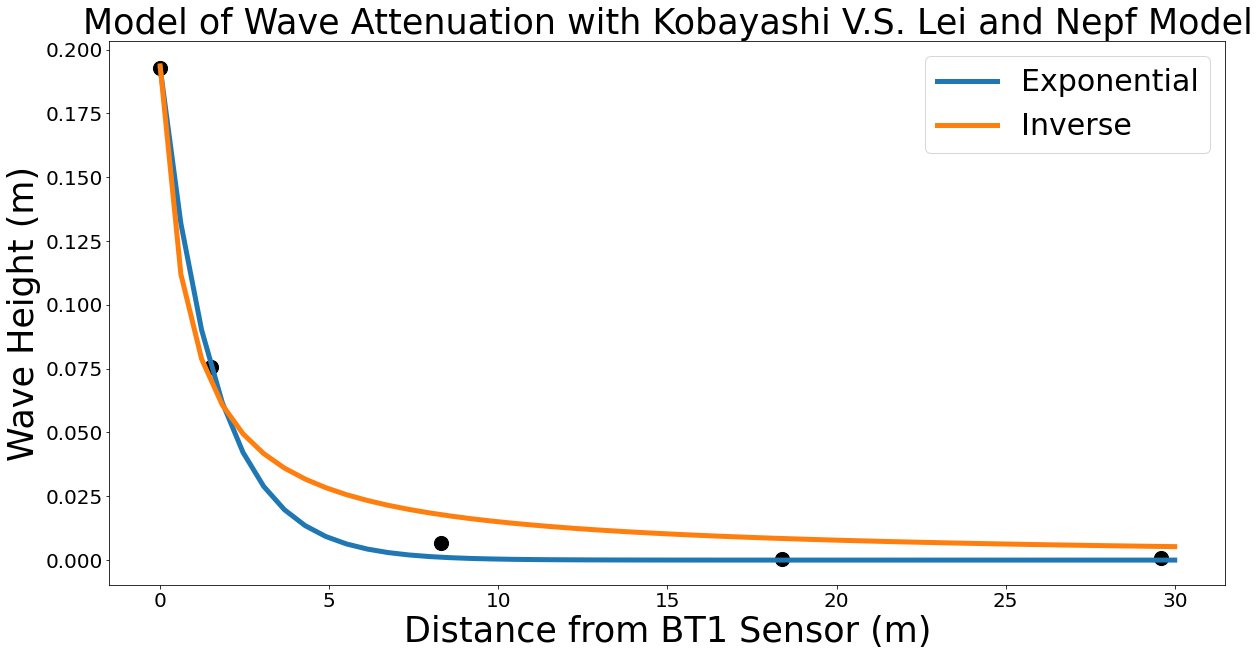

In [14]:
#Total Time: 2480 - 2544
start = 2500
end = 2506
avg_heights = [np.mean(bt1["avg wave height"][start:end]), np.mean(bt2["avg wave height"][start:end]), 
              np.mean(bt3["avg wave height"][start:end]), np.mean(bt4["avg wave height"][start:end]),
              np.mean(bt5["avg wave height"][start:end])]
kobayashi_consts, kobayashi_covar = curve_fit(kobayashi, X, avg_heights)
moller_consts, moller_covar = curve_fit(moller, X, avg_heights)
lei_consts, lei_covar = curve_fit(lei, X, avg_heights)
kobayashi_out = []
moller_out = []
lei_out = []
for i in plotx:
    kobayashi_out = np.append(kobayashi_out, kobayashi(i, *kobayashi_consts))
    moller_out = np.append(moller_out, moller(i, *moller_consts))
    lei_out = np.append(lei_out, lei(i, *lei_consts))


print("Start time: ", bt1["time"][start])
print("End time: ", bt1["time"][end])
print("Kobayashi Variance: ", kobayashi_covar[1,0])
#print("Moller Variance: ", moller_covar[1,0])
print("Lei and Kampf Variance: ", lei_covar[1,0])
fig = plt.figure(figsize=(20,10))
plt.plot(plotx, kobayashi_out, linewidth=5)
#plt.plot(plotx, moller_out)
plt.plot(plotx, lei_out, linewidth=5)
plt.scatter(X, avg_heights, color="black", s=200)
plt.title("Model of Wave Attenuation with Kobayashi V.S. Lei and Nepf Model", fontdict = {'fontsize' : 35})
plt.xlabel("Distance from BT1 Sensor (m)", fontdict = {'fontsize' : 35})
plt.ylabel("Wave Height (m)", fontdict = {'fontsize' : 35})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["Exponential", "Inverse"], fontsize=30)
plt.show()

This code uses the exponential curve function to fit the data points in all the time intervals during an inundation period and gives us k, the constant that dictates how fast the wave attenuates in the model. I then plotted how k changes over time along with depth and the mean k value. We can see that k has an inverse relationship with depth. 

Start time:  2021-06-23 04:50:00.000
End time:  2021-06-23 07:00:00.000
Mean K:  0.3535910053836411


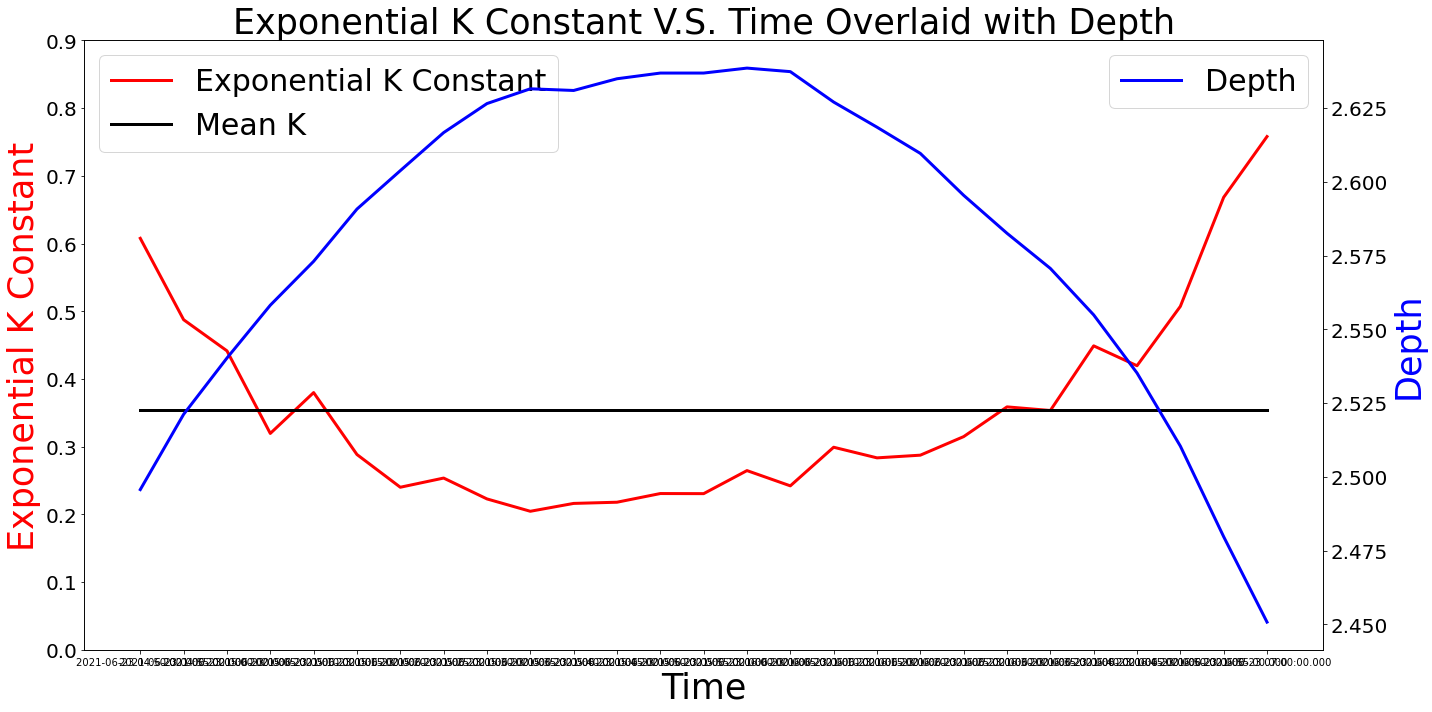

In [16]:
#Total time: 2195 - 2246, 2206 - 2232
start = 2206
end = 2232

pts = np.arange(start, end+1)
k = []

for i in pts:
    heights = [bt1["avg wave height"][i], bt2["avg wave height"][i], bt3["avg wave height"][i],
              bt4["avg wave height"][i], bt5["avg wave height"][i]]
    kobayashi_consts, kobayashi_covar = curve_fit(kobayashi, X, heights, maxfev=5000)
    k = np.append(k, kobayashi_consts[1])


fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlabel("Time", fontsize = 35)
ax1.set_ylabel("Exponential K Constant", color="red", fontsize = 35)
ax1.plot(bt1["time"][start:end+1], k, color="red", linewidth=3)
ax1.plot(bt1["time"][start:end+1], [np.mean(k)] * (end-start+1), color="black", linewidth=3)
plt.yticks(fontsize=20)
ax1.set_ylim([0,0.9])
plt.legend(["Exponential K Constant", "Mean K"], fontsize=30)

ax2 = ax1.twinx()
ax2.set_xlabel("Time", fontsize = 35)
ax2.set_ylabel("Depth", color="blue", fontsize = 35)
ax2.plot(bt1["time"][start:end+1], bt1["depth_corrected"][start:end+1], color="blue", linewidth=3)
plt.legend(["Depth"], fontsize=30)
plt.yticks(fontsize=20)
print("Start time: ", bt1["time"][start])
print("End time: ", bt1["time"][end])
print("Mean K: ", np.mean(k))


plt.title("Exponential K Constant V.S. Time Overlaid with Depth", fontdict = {'fontsize' : 35})
plt.tight_layout()
plt.show()